## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0721 10:01:22.244821  2792 deprecation_wrapper.py:119] From C:\Users\Dragonfly\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0721 10:01:22.245822  2792 deprecation_wrapper.py:119] From C:\Users\Dragonfly\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0721 10:01:23.554942  2792 deprecation_wrapper.py:119] From C:\Users\Dragonfly\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 10:01:23.555944  2792 deprecation_wrapper.py:119] From C:\Users\Dragonfly\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 10:01:

Experiment with LR = 0.100000


W0721 10:01:23.998719  2792 deprecation_wrapper.py:119] From C:\Users\Dragonfly\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0721 10:01:24.641675  2792 deprecation.py:323] From C:\Users\Dragonfly\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 42s 836us/step - loss: 2.2485 - acc: 0.1547 - val_loss: 2.0551 - val_acc: 0.1954
Epoch 2/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.9609 - acc: 0.2527 - val_loss: 1.8956 - val_acc: 0.2786
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8708 - acc: 0.3074 - val_loss: 1.8320 - val_acc: 0.3330
Epoch 4/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.8191 - acc: 0.3406 - val_loss: 1.9060 - val_acc: 0.3261
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7923 - acc: 0.3511 - val_loss: 1.7982 - val_acc: 0.3510
Epoch 6/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7696 - acc: 0.3592 - val_loss: 1.8620 - val_acc: 0.3379
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7552 - acc: 0.3699 - val_loss: 1.7996 -

Epoch 2/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6128 - acc: 0.4288 - val_loss: 1.5656 - val_acc: 0.4445
Epoch 3/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5209 - acc: 0.4582 - val_loss: 1.5373 - val_acc: 0.4592
Epoch 4/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4540 - acc: 0.4847 - val_loss: 1.5580 - val_acc: 0.4411
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4056 - acc: 0.5012 - val_loss: 1.4549 - val_acc: 0.4863
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.3660 - acc: 0.5152 - val_loss: 1.4817 - val_acc: 0.4692
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.3318 - acc: 0.5284 - val_loss: 1.4239 - val_acc: 0.4935
Epoch 8/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.2993 - acc: 0.5396 - val_loss: 1.4214 - val_acc: 0.4936
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 121us/step - loss: 1.9860 - acc: 0.3061 - val_loss: 1.9648 - val_acc: 0.3064
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.9426 - acc: 0.3205 - val_loss: 1.9287 - val_acc: 0.3206
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9105 - acc: 0.3319 - val_loss: 1.9015 - val_acc: 0.3275
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8858 - acc: 0.3403 - val_loss: 1.8789 - val_acc: 0.3397
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8645 - acc: 0.3483 - val_loss: 1.8589 - val_acc: 0.3443
Epoch 9/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8461 - acc: 0.3547 - val_loss: 1.8441 - val_acc: 0.3520
Epoch 10/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8313 - acc: 0.3596 - val_loss: 1.8286 - val_acc: 0.3561
Epoch 11/50
50000/50000 [===================

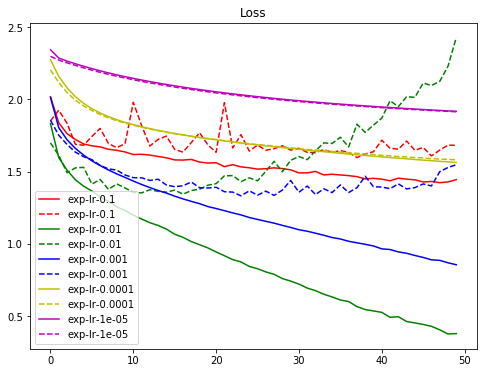

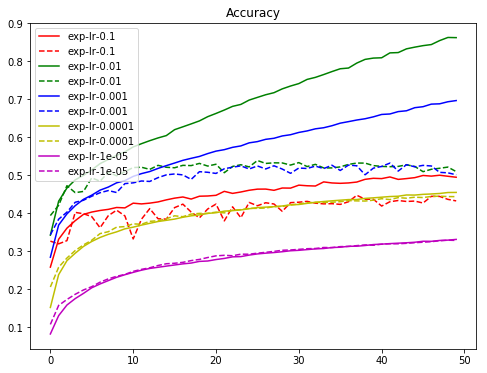

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

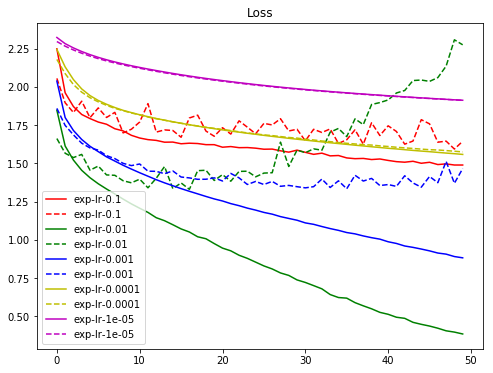

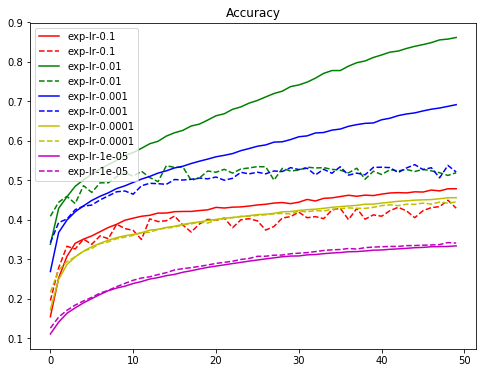

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現